<a href="https://colab.research.google.com/github/KnzMcn/Attempts-At-Learning-CNN/blob/main/cnn_with_imagedatasetfromdirectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
import zipfile
import os
from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Rescaling, Input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, image_dataset_from_directory
from keras.optimizers import RMSprop

# Import the dataset

In [4]:
# mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# unzip the dataset file
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/3rd year/Machine Learning/Learning Evidence/Alzheimers.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
#resize the image for faster processing
main_directory = '/content/Alzheimers/'

for subdir, dirs, files in os.walk(main_directory):
  for file in files:
    filepath = os.path.join(subdir, file)

    if filepath.endswith('.jpg'):
      im = Image.open(filepath)
      imResize = im.resize((80, 80), Image.ANTIALIAS)
      imResize.save(filepath, 'JPEG', quality=90)

In [ ]:
# initialize augmentor
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

# generate augmented images
train_set = train_datagen.flow_from_directory('/content/Alzheimers/train',
                                              batch_size = 32, 
                                              target_size = (80, 80), 
                                              class_mode = 'categorical',
                                              subset = 'training')
val_set = train_datagen.flow_from_directory('/content/Alzheimers/train',
                                            batch_size = 32,
                                            target_size = (80, 80),
                                            class_mode = 'categorical',
                                            subset = 'validation')
test_set = test_datagen.flow_from_directory('/content/Alzheimers/test',
                                            batch_size = 32, 
                                            target_size = (80, 80),
                                            class_mode = 'categorical')

AttributeError: ignored

In [ ]:
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [7]:
# generate the image datasets
train_set = image_dataset_from_directory('/content/Alzheimers/train',
                                         label_mode = 'int',
                                         color_mode = 'grayscale',
                                         batch_size = 256, 
                                         image_size = (80, 80),  
                                         validation_split = 0.2,                                                                    
                                         subset = 'training',
                                         seed = 0)

val_set = image_dataset_from_directory('/content/Alzheimers/train',
                                       label_mode = 'int',
                                       color_mode = 'grayscale',
                                       batch_size = 256,
                                       image_size = (80, 80),
                                       validation_split = 0.2,
                                       subset = 'validation',
                                       seed = 0)

test_set = image_dataset_from_directory('/content/Alzheimers/test',
                                        label_mode = 'int',
                                        color_mode = 'grayscale',
                                        batch_size = 256, 
                                        image_size = (80, 80))

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


In [ ]:
# generate the image datasets
train_set = image_dataset_from_directory('/content/Alzheimers/train',
                                         label_mode = 'int',
                                         color_mode = 'grayscale',
                                         batch_size = 256, 
                                         image_size = (80, 80))

test_set = image_dataset_from_directory('/content/Alzheimers/test',
                                        label_mode = 'int',
                                        color_mode = 'grayscale',
                                        batch_size = 256, 
                                        image_size = (80, 80))

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [8]:
# get the class labels
class_labels = train_set.class_names
class_labels

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

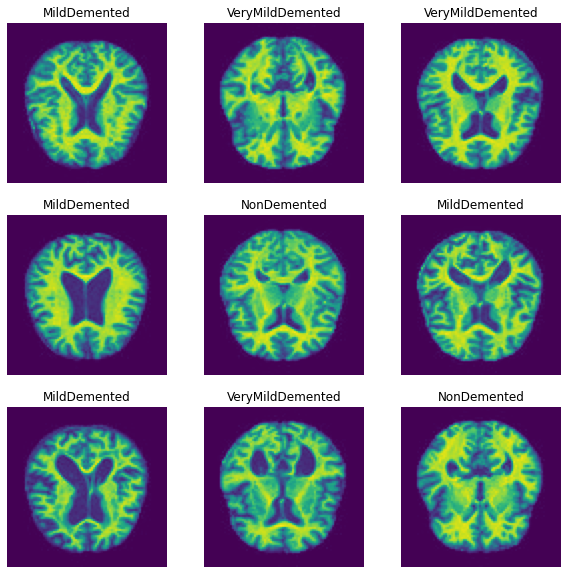

In [9]:
# display the images
plt.figure(figsize = (10, 10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('float32').reshape(80, 80))
    plt.title(class_labels[labels[i]])
    plt.axis('off')

In [10]:
# retrive the batches and labels of the train and test set
for train_batch, train_labels in train_set:
  train_labels = train_labels
  print(train_batch.shape, train_labels.shape)
  break

for test_batch, test_labels in test_set:
  test_labels = test_labels
  print(test_batch.shape, test_labels.shape)
  break

(256, 80, 80, 1) (256,)
(256, 80, 80, 1) (256,)


In [ ]:
# rescale the images
train_set = 

In [ ]:
# display the images
plt.imshow(train_set[0].reshape(80, 80, 3))
#plt.title(train_labels[0])
plt.axis('off')

AttributeError: ignored

In [ ]:
# divide the images into their train and test set
(train_set, train_labels), (test_set, test_labels) = image_dataset_loader.load('/content/Alzheimers', ['train', 'test'])

# Preprocessing

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_set = train_set.cache().prefetch(buffer_size = AUTOTUNE)
test_set = test_set.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
# initialize the standardizer
normalization_layer = Rescaling(1./255)

In [ ]:
# apply preprocessing to dataset
normalized_set = train_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_set))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9686275


In [ ]:
# initialize augmentor
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   #shear_range = 0.2, 
                                   #zoom_range = 0.2, 
                                   #horizontal_flip = True, 
                                   #validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

# reshape the images
train_set = train_set.astype('float32')
train_set = np.reshape(train_set, (len(train_set), 80, 80, 1))
test_set = test_set.astype('float32')
test_set = np.reshape(test_set, (len(test_set), 80, 80, 1))

# generate augmented images
train_datagen.fit(train_set)
test_datagen.fit(test_set)

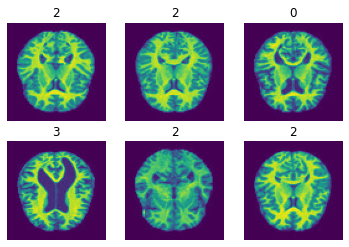

In [ ]:
# visualize the augmented images
for train_set, train_labels in train_datagen.flow(train_set, train_labels, batch_size = 256):
  for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(train_set[i].reshape(80, 80)/255)
    plt.title(train_labels[i])
    plt.axis('off')
  break

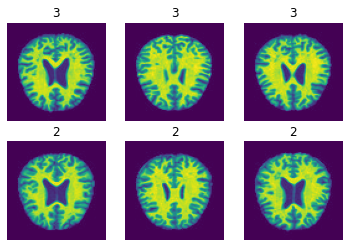

In [ ]:
for test_set, test_labels in test_datagen.flow(test_set, test_labels, batch_size = 256):
  for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(test_set[i].reshape(80, 80)/255)
    plt.title(test_labels[i])
    plt.axis('off')
  break

In [ ]:
from sklearn.model_selection import train_test_split
train_set, val_set, train_labels, val_labels = train_test_split(train_set, train_labels, test_size = 0.20, random_state = 0)

In [ ]:
# perform one hot encoding
train_encoded = to_categorical(train_labels)
test_encoded = to_categorical(test_labels)
val_encoded = to_categorical(val_labels)

# display the changes done
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_encoded[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0.]


In [ ]:
# check the shapes of the sets and its labels
print(train_set.shape, train_labels.shape, train_encoded.shape)
print(test_set.shape, test_labels.shape, test_encoded.shape)
print(val_set.shape, val_labels.shape, val_encoded.shape)

(204, 80, 80, 1) (204,) (204, 4)
(256, 80, 80, 1) (256,) (256, 4)
(52, 80, 80, 1) (52,) (52, 4)


# Convolutional Neural Network

In [13]:
# state the number of classes and input shape
num_classes = 4
input_img = (80, 80, 1)

In [18]:
# build the network
cnn = Sequential([Input(shape = input_img), 
                  Rescaling(1./255),
                  
                  #Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'),
                  #MaxPooling2D(2),
                  #Dropout(0.5),              

                  Conv2D(128, kernel_size = 3, activation = 'relu', padding = 'same'),
                  MaxPooling2D(2),
                  Dropout(0.5),

                  Flatten(),
                  Dense(128, activation = 'relu'),
                  Dropout(0.50),
                  Dense(num_classes, activation = 'softmax')])

In [19]:
# compile the network
cnn.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])
cnn.build(input_img)

In [20]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 80, 80, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 128)       1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 40, 40, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               26214528  
                                                      

# Train the model using the Generator

In [21]:
cnn_history = cnn.fit(train_set,
                      #steps_per_epoch = len(train_set)/256,
                      epochs = 20, 
                      verbose = 1,
                      validation_data = val_set)

Epoch 1/20
17/17 [==============================] - 44s 3s/step - loss: 2.8577 - accuracy: 0.3705 - val_loss: 1.0913 - val_accuracy: 0.5537
Epoch 2/20
17/17 [==============================] - 43s 3s/step - loss: 1.1315 - accuracy: 0.4655 - val_loss: 1.0558 - val_accuracy: 0.5020
Epoch 3/20
17/17 [==============================] - 42s 2s/step - loss: 1.0772 - accuracy: 0.4818 - val_loss: 1.0163 - val_accuracy: 0.5039
Epoch 4/20
17/17 [==============================] - 42s 2s/step - loss: 1.0533 - accuracy: 0.4794 - val_loss: 1.0044 - val_accuracy: 0.5088
Epoch 5/20
17/17 [==============================] - 46s 3s/step - loss: 1.0292 - accuracy: 0.4982 - val_loss: 0.9835 - val_accuracy: 0.5684
Epoch 6/20
17/17 [==============================] - 44s 3s/step - loss: 0.9904 - accuracy: 0.5406 - val_loss: 0.9306 - val_accuracy: 0.5684
Epoch 7/20
17/17 [==============================] - 43s 3s/step - loss: 0.9452 - accuracy: 0.5631 - val_loss: 0.9134 - val_accuracy: 0.5898
Epoch 8/20
17/17 [==

# Visualization

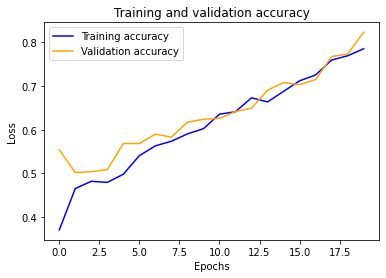

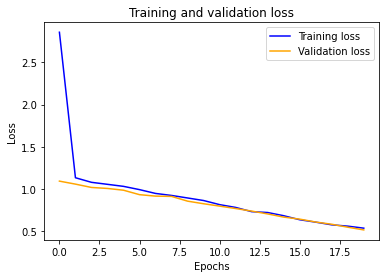

In [22]:
#visualization of the model evaluation
#plot image will change with more epochs
accuracy = cnn_history.history['accuracy']
val_accuracy = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']
epochs = range(len(accuracy))

#Visualize the accuracy
plt.plot(epochs, accuracy, 'b', c = 'blue', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', c = 'orange', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

#Visualize the loss
plt.plot(epochs, loss, 'b', c = 'blue', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', c = 'orange', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation

In [24]:
test_eval = cnn.evaluate(test_set, test_labels, verbose = 0)

ValueError: ignored

In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

NameError: ignored

# Classification Report

In [ ]:
pred_classes = cnn.predict(test_set)

In [ ]:
pred_classes = np.argmax(np.round(pred_classes), axis = 1)

In [ ]:
from sklearn.metrics import classification_report

#create a classification report
target_names = ['Class {}'.format(i) for i in range(4)]
print(classification_report(test_labels, pred_classes, target_names = target_names))